<a href="https://colab.research.google.com/github/miraculinp/Lipophilicity-Prediction/blob/main/Lipophilicity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit-pypi

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Chemistry/Lipophilicitydata.csv")

In [ ]:
df.head()

,pdid,name,smiles,logp
0,PD000001,BAZ2-ICR,Cn1cc(CCn2cnc(-c3cnn(C)c3)c2-c2ccc(C#N)cc2)cn1,2.80
1,PD000002,I-BRD9,CCn1cc(-c2cccc(C(F)(F)F)c2)c2sc(C(=N)NC3CCS(=O...,4.26
2,PD000003,UNC0638,COc1cc2c(NC3CCN(C(C)C)CC3)nc(C3CCCCC3)nc2cc1OC...,5.84
3,PD000004,LP99,Cc1cc(=O)n(C)c2cc(N3C(=O)CC[C@H](NS(=O)(=O)CC(...,4.31
4,PD000005,UNC1215,O=C(c1ccc(C(=O)N2CCC(N3CCCC3)CC2)c(Nc2ccccc2)c...,4.83


In [ ]:
df.shape

(10000, 4)

In [ ]:
mols = df.smiles.apply(Chem.MolFromSmiles)

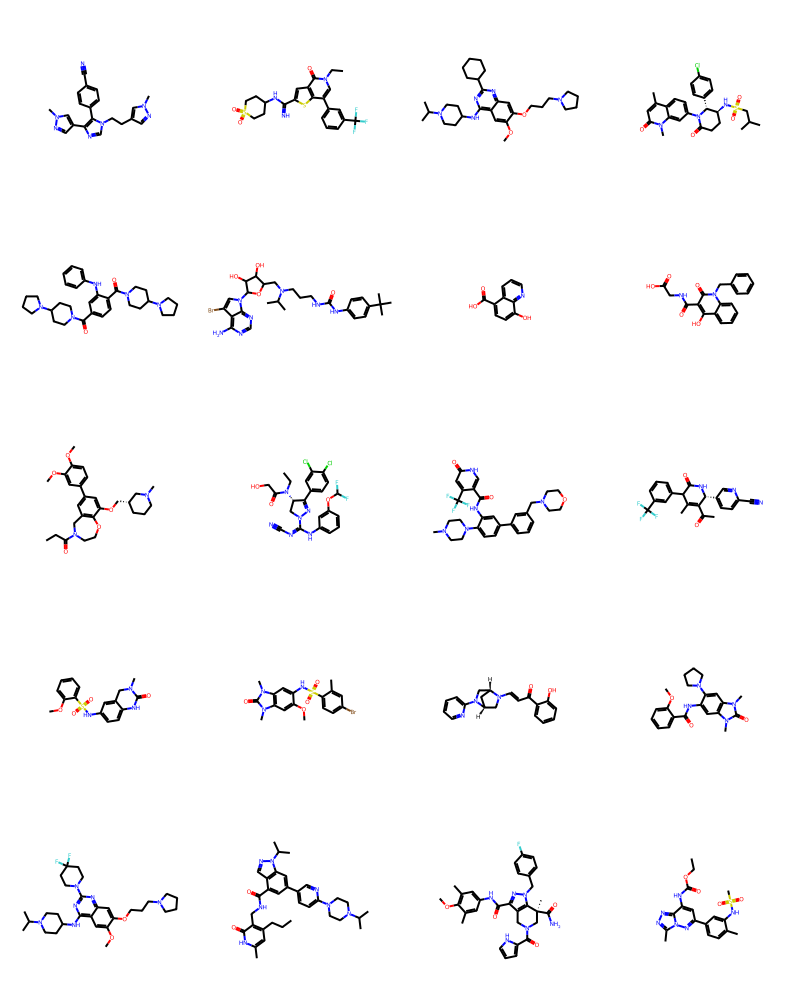

In [ ]:
Draw.MolsToGridImage(mols[:20],molsPerRow=4)

In [ ]:
#List of descriptors
descriptor = list(np.array(Descriptors._descList)[:,0])
print(np.array(Descriptors._descList)[:,0])

['MaxEStateIndex' 'MinEStateIndex' 'MaxAbsEStateIndex' 'MinAbsEStateIndex'
 'qed' 'MolWt' 'HeavyAtomMolWt' 'ExactMolWt' 'NumValenceElectrons'
 'NumRadicalElectrons' 'MaxPartialCharge' 'MinPartialCharge'
 'MaxAbsPartialCharge' 'MinAbsPartialCharge' 'FpDensityMorgan1'
 'FpDensityMorgan2' 'FpDensityMorgan3' 'BCUT2D_MWHI' 'BCUT2D_MWLOW'
 'BCUT2D_CHGHI' 'BCUT2D_CHGLO' 'BCUT2D_LOGPHI' 'BCUT2D_LOGPLOW'
 'BCUT2D_MRHI' 'BCUT2D_MRLOW' 'BalabanJ' 'BertzCT' 'Chi0' 'Chi0n' 'Chi0v'
 'Chi1' 'Chi1n' 'Chi1v' 'Chi2n' 'Chi2v' 'Chi3n' 'Chi3v' 'Chi4n' 'Chi4v'
 'HallKierAlpha' 'Ipc' 'Kappa1' 'Kappa2' 'Kappa3' 'LabuteASA' 'PEOE_VSA1'
 'PEOE_VSA10' 'PEOE_VSA11' 'PEOE_VSA12' 'PEOE_VSA13' 'PEOE_VSA14'
 'PEOE_VSA2' 'PEOE_VSA3' 'PEOE_VSA4' 'PEOE_VSA5' 'PEOE_VSA6' 'PEOE_VSA7'
 'PEOE_VSA8' 'PEOE_VSA9' 'SMR_VSA1' 'SMR_VSA10' 'SMR_VSA2' 'SMR_VSA3'
 'SMR_VSA4' 'SMR_VSA5' 'SMR_VSA6' 'SMR_VSA7' 'SMR_VSA8' 'SMR_VSA9'
 'SlogP_VSA1' 'SlogP_VSA10' 'SlogP_VSA11' 'SlogP_VSA12' 'SlogP_VSA2'
 'SlogP_VSA3' 'SlogP_VSA4' 'SlogP_VS

###**Calculating RDKIT molecular descriptors **

> Indented block



In [ ]:
# Creating a function to calculate all RDKit descriptors
def calculate_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES strings
    descriptors = {descriptor_name: descriptor(mol) for descriptor_name, descriptor in Descriptors.descList}
    return descriptors

In [ ]:
# Applying the function to the DataFrame df
df['descriptors'] = df['smiles'].apply(calculate_all_descriptors)

# If you want to expand the dictionary into separate columns, you can use the following:
df_new = pd.concat([df.drop(['descriptors'], axis=1), df['descriptors'].apply(pd.Series)], axis=1)

In [ ]:
df_new.shape

(10000, 212)

In [ ]:
#List of columns in df_new
column_names = df_new.columns.tolist()
column_names

['pdid',
 'name',
 'smiles',
 'logp',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_V

### **Checking for outliers**

<Axes: xlabel='logp'>

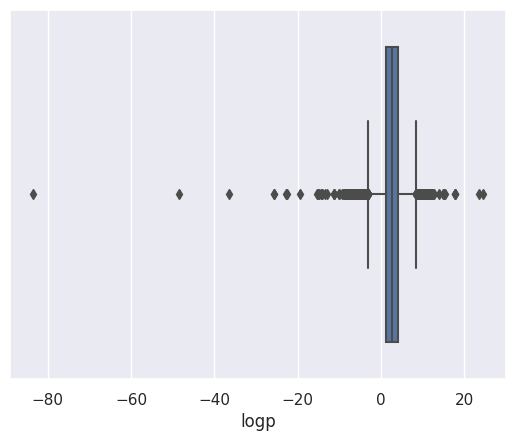

In [ ]:
#using boxplot to check for outliers
sns.boxplot(data=df_new, x='logp')

In [ ]:
#Removing outliers
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = df_new['logp'].quantile(0.25)
Q3 = df_new['logp'].quantile(0.75)

# Calculating the IQR(interquatile range)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to keep only rows within the bounds
df_new = df_new[(df_new['logp'] >= lower_bound) & (df_new['logp'] <= upper_bound)]

In [ ]:
#checking the shape of the dataframe after removing outliers
df_new.shape

(9726, 212)

<Axes: xlabel='logp'>

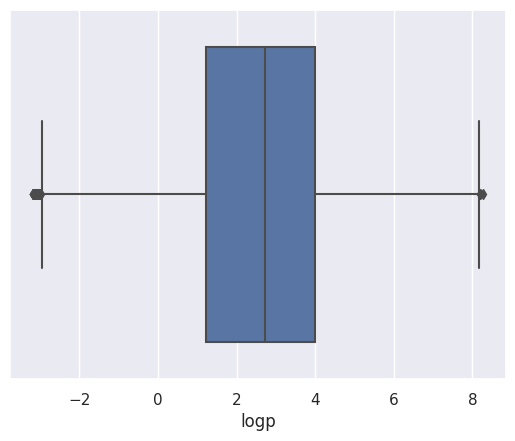

In [ ]:
#boxplot after removing outliers
sns.boxplot(data=df_new, x='logp')

### **Handling missing values**








In [ ]:
df_logp = df_new.copy()

In [ ]:
#checking for missing values in df_new
nan_values = df_logp.isna().sum().sum()
nan_values

1580

In [ ]:
df_logp = df_logp.dropna()

In [ ]:
#checking for nan values in df_new
nan_val = df_logp.isna().sum().sum()
nan_val

0

In [ ]:
#Checking the shape of df_new
df_logp.shape

(9582, 212)

### **Creating the independent and target **



In [ ]:
#Creacting the Dependent variable and independepent variables
X = df_logp .drop(["pdid","name","smiles","logp","MolLogP"], axis=1)
y = df_logp ["logp"]

In [ ]:
X.shape

(9582, 207)

In [ ]:
y.shape

(9582,)

In [ ]:
#importing more libraries needed
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

### **Normalizing and Building the model**

In [ ]:
# Normalize descriptors using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
xgb = xgb.XGBRegressor(verbosity=0)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [ ]:
# get cv scores
cv_scores = cross_val_score(xgb, X_scaled, y, cv = 10)

In [ ]:
print('CV accuracy scores: %s' % cv_scores)

CV accuracy scores: [0.96263234 0.96989018 0.94797064 0.93008596 0.91878107 0.9593983
 0.95898578 0.94725027 0.93747331 0.94619991]


In [ ]:
print('The average cross validation score (10 folds): {}'.format(np.mean(cv_scores)))

The average cross validation score (10 folds): 0.9478667778543899


In [ ]:
#Splitting into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [ ]:
# Normalize descriptors using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2) Score: {r2}")

R-squared (R^2) Score: 0.9566719900592656


In [ ]:
# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#To calculate RMSE(root mean square error)
rmse = sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.42224880326842185


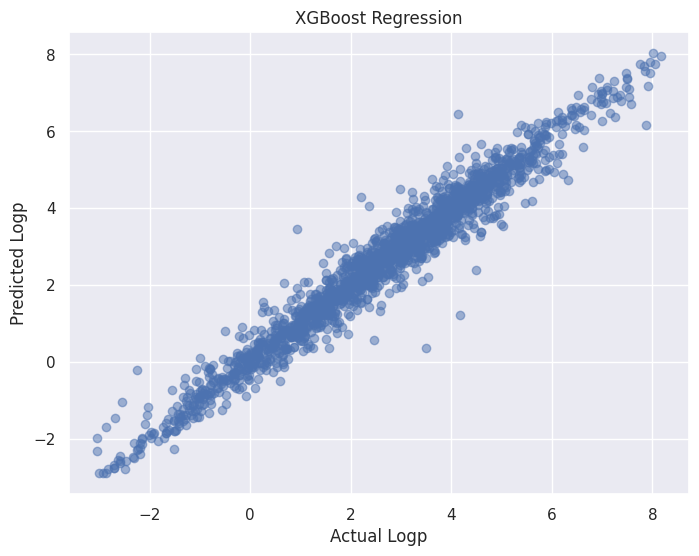

In [ ]:
#Creating a scatter plot to visualize the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('XGBoost Regression')
plt.xlabel('Actual Logp')
plt.ylabel('Predicted Logp')
plt.show()